In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#Data cleaning and preprocessing
#Load Data
data = pd.read_csv('Desktop/DataScience/race.csv')

#Display dataset 
data.head()

# Check data types
data.dtypes

# Summary statistics
data.describe()

# Check for Missing values and delete them 
data.isnull().sum()
data=data.dropna()
#no missing values found
# dataset is clean

#Normalize data
scaler = MinMaxScaler()
data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
      'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
      'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']] = scaler.fit_transform(data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                                 'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                                 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']])




,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


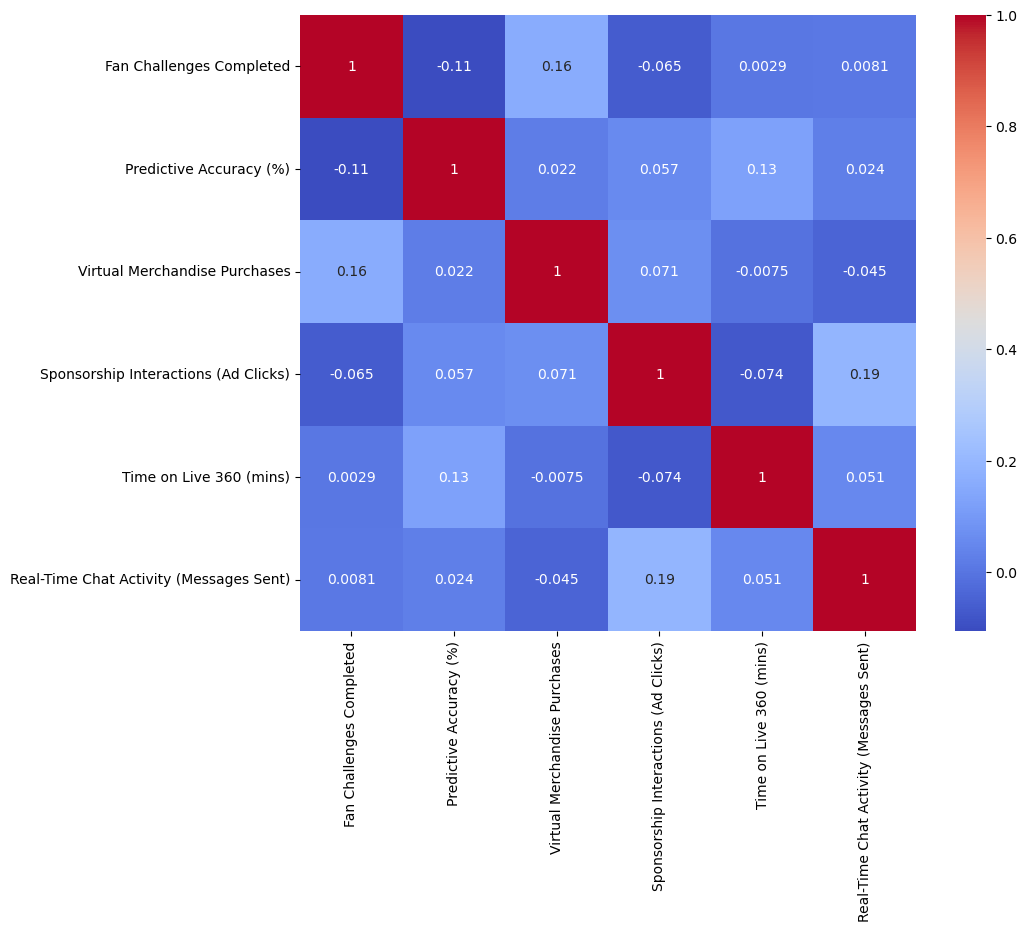

In [26]:
#correlation matrix for all data
numeric_cols = data.select_dtypes(include=[np.number]).columns

# Correlation matrix
corr = data[numeric_cols].corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.show()

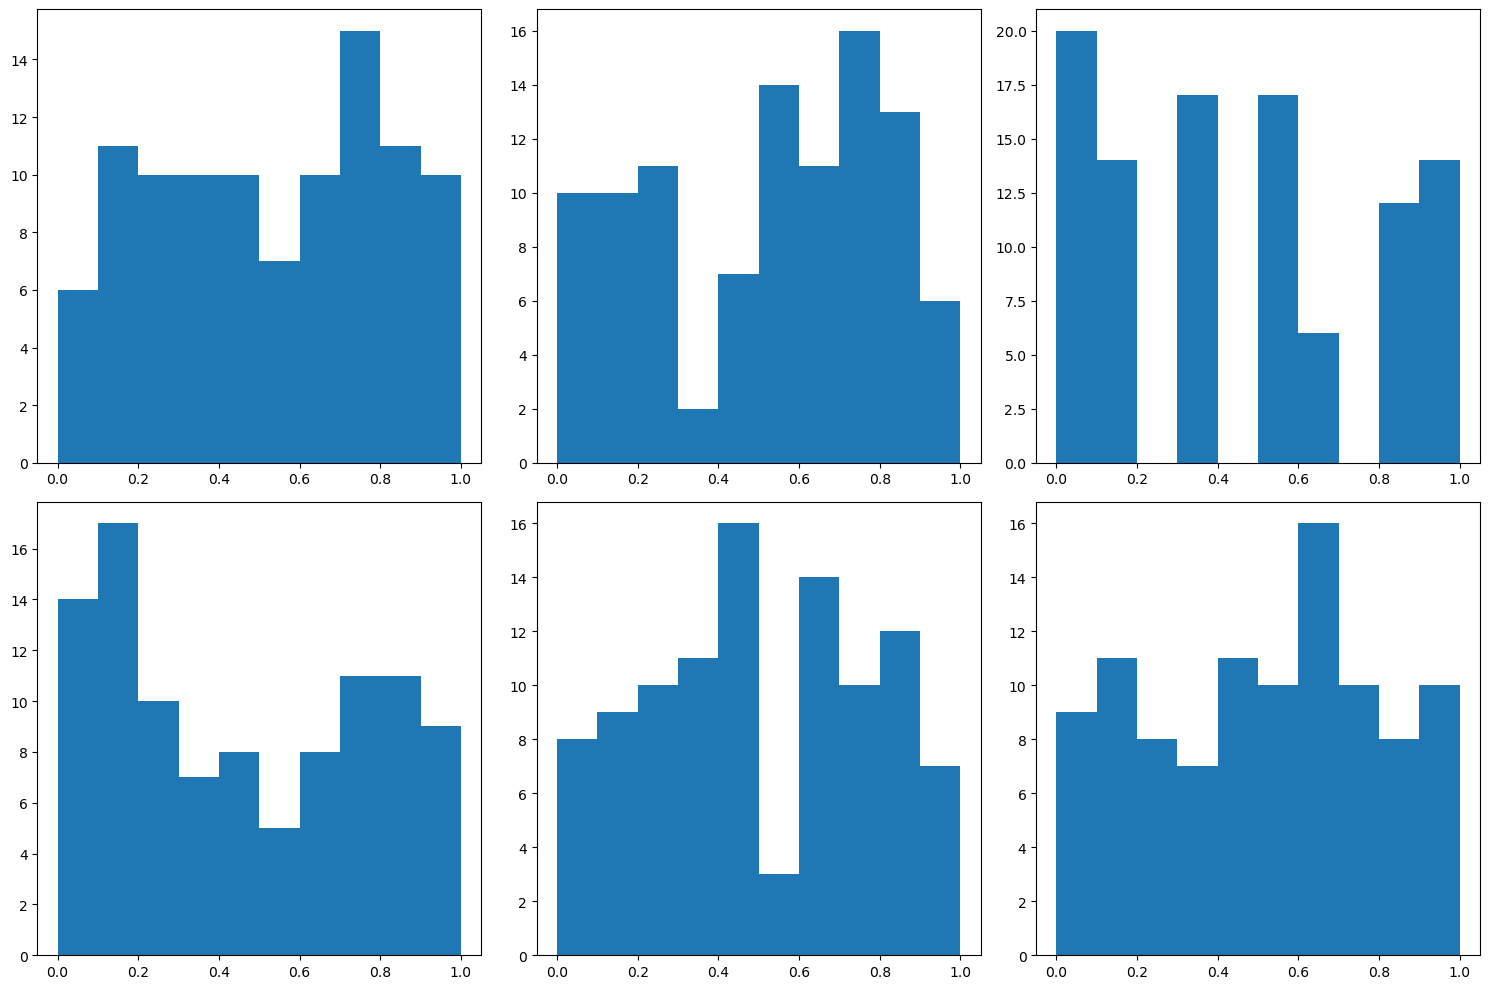

In [28]:
# Distribution plots to visualize the entire dataset
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0, 0].hist(data['Fan Challenges Completed'])
axes[0, 1].hist(data['Predictive Accuracy (%)'])
axes[0, 2].hist(data['Virtual Merchandise Purchases'])
axes[1, 0].hist(data['Sponsorship Interactions (Ad Clicks)'])
axes[1, 1].hist(data['Time on Live 360 (mins)'])
axes[1, 2].hist(data['Real-Time Chat Activity (Messages Sent)'])

plt.tight_layout()
plt.show()

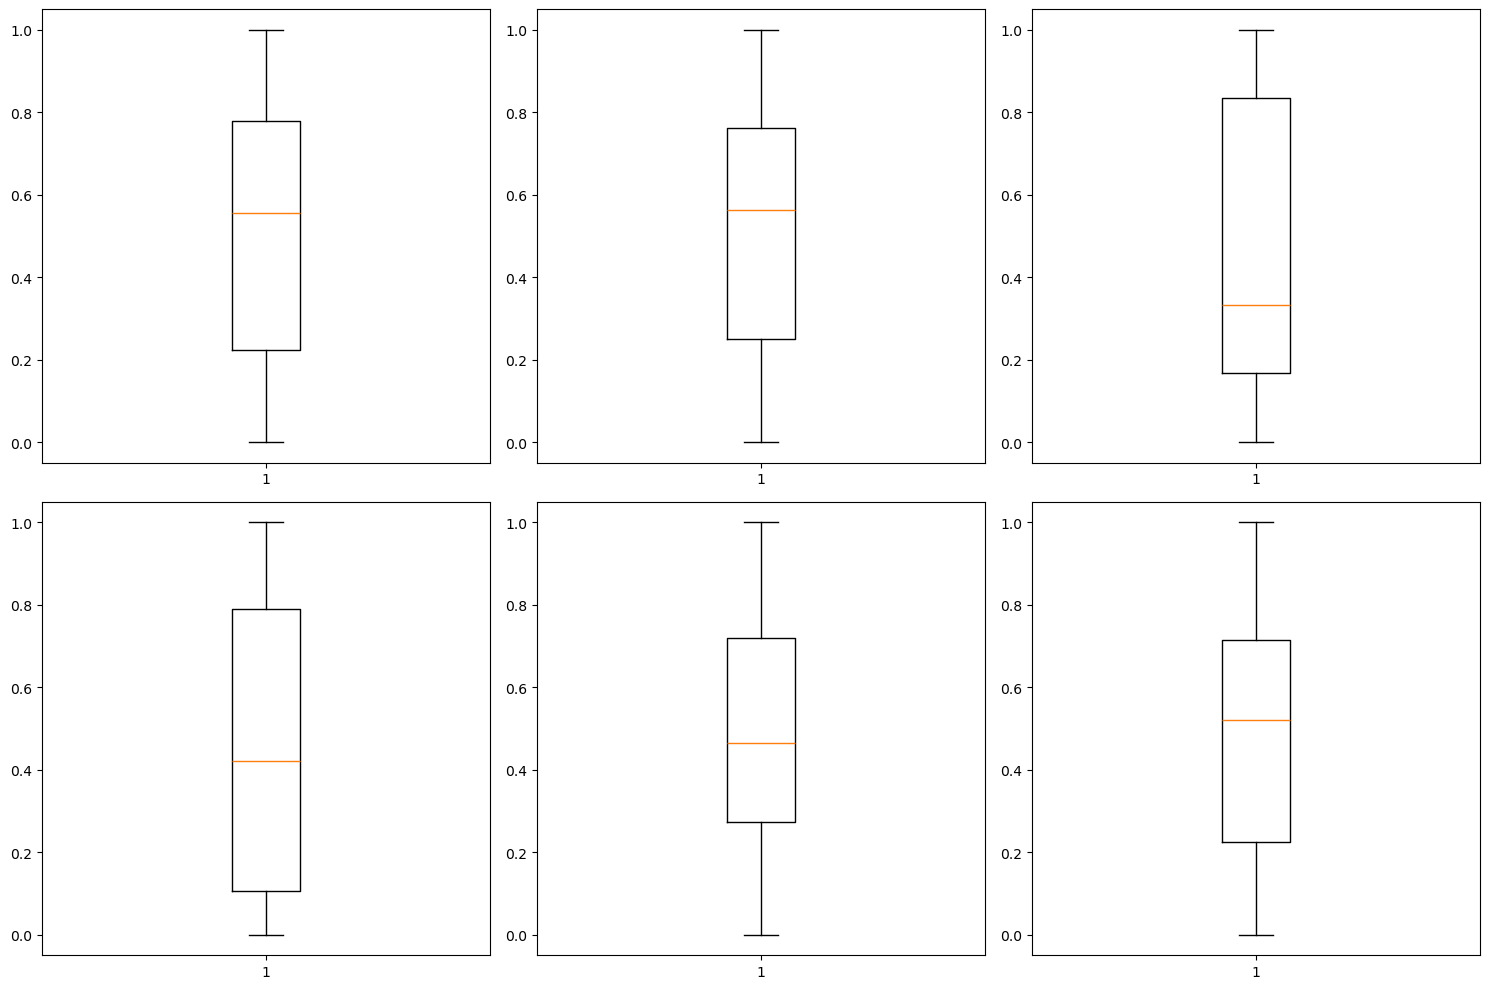

In [30]:
# Box plot for the entire dataset
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes[0, 0].boxplot(data['Fan Challenges Completed'])
axes[0, 1].boxplot(data['Predictive Accuracy (%)'])
axes[0, 2].boxplot(data['Virtual Merchandise Purchases'])
axes[1, 0].boxplot(data['Sponsorship Interactions (Ad Clicks)'])
axes[1, 1].boxplot(data['Time on Live 360 (mins)'])
axes[1, 2].boxplot(data['Real-Time Chat Activity (Messages Sent)'])

plt.tight_layout()
plt.show()

In [38]:
#user behaviour towards virtual merchandise purchases
virtual_merchandise_users = data[data['Virtual Merchandise Purchases'] > 0]

# View top 20 users
print(virtual_merchandise_users.nlargest(20,'Virtual Merchandise Purchases'))

   User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
5     U006                  1.000000                 0.729167   
10    U011                  0.666667                 0.708333   
22    U023                  0.777778                 0.666667   
35    U036                  0.000000                 0.750000   
46    U047                  0.888889                 0.291667   
48    U049                  0.111111                 0.520833   
52    U053                  1.000000                 0.791667   
60    U061                  0.222222                 0.916667   
75    U076                  1.000000                 0.562500   
78    U079                  0.666667                 0.395833   
82    U083                  0.111111                 0.500000   
90    U091                  0.666667                 0.791667   
91    U092                  0.888889                 0.104167   
95    U096                  0.777778                 0.750000   
4     U005               

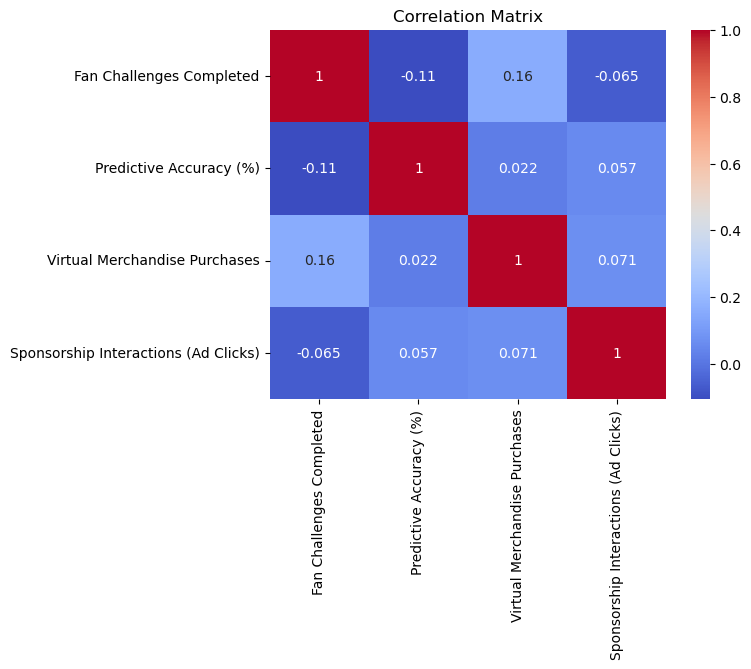

In [40]:
# User behaviour - Correlation matrix
corr = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 
             'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']].corr()

# Visualize correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

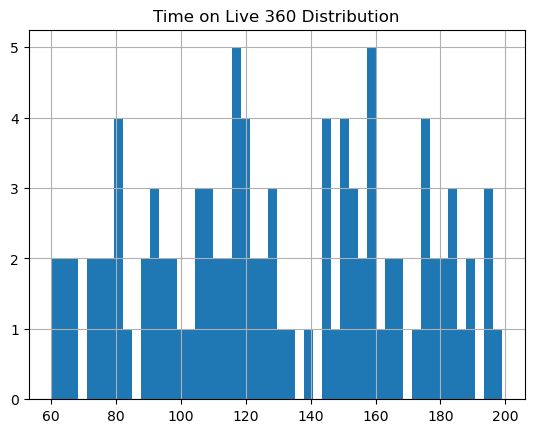

   User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
71    U072                         6                       91   
11    U012                         4                       82   
70    U071                         4                       51   
19    U020                         5                       57   
72    U073                         2                       94   
83    U084                         5                       88   
69    U070                        10                       77   
78    U079                         7                       69   
33    U034                         6                       50   
58    U059                         7                       72   

    Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
71                              3                                    18   
11                              2                                     1   
70                              2                          

In [56]:
#user engagement during live 
import matplotlib.pyplot as plt
data['Time on Live 360 (mins)'].hist(bins=50)
plt.title('Time on Live 360 Distribution')
plt.show()

# Adjust threshold
threshold = 50
race_event_engagement_users = data[data['Time on Live 360 (mins)'] > threshold]

# View top 10 users
if not race_event_engagement_users.empty:
    print(race_event_engagement_users.nlargest(10, 'Time on Live 360 (mins)'))
else:
    print(f"No users have 'Time on Live 360 (mins)' greater than {threshold}.")

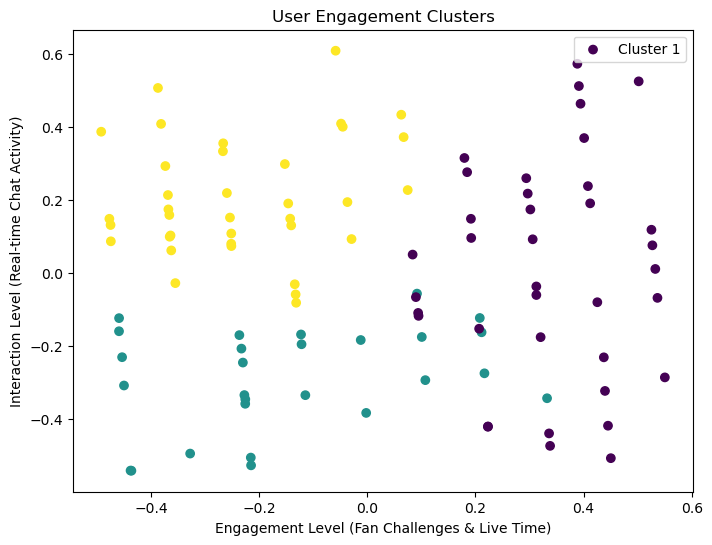

In [24]:
# Clustering users based on engagement
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['Fan Challenges Completed', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']])
data['cluster'] = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['Fan Challenges Completed', 'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']])

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['cluster'])
plt.title('User Engagement Clusters')
plt.xlabel('Engagement Level (Fan Challenges & Live Time)')
plt.ylabel('Interaction Level (Real-time Chat Activity)')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.show()

MSE: 0.12
R2 Score: 0.01


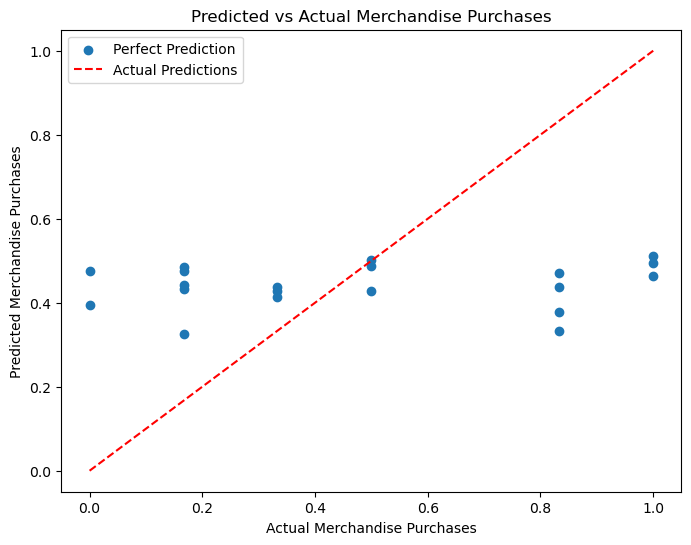

In [26]:
# Predictive model for merchandise purchases
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Sponsorship Interactions (Ad Clicks)']]
y = data['Virtual Merchandise Purchases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Predicted vs Actual Merchandise Purchases')
plt.xlabel('Actual Merchandise Purchases')
plt.ylabel('Predicted Merchandise Purchases')
plt.legend(['Perfect Prediction', 'Actual Predictions'])
plt.show()

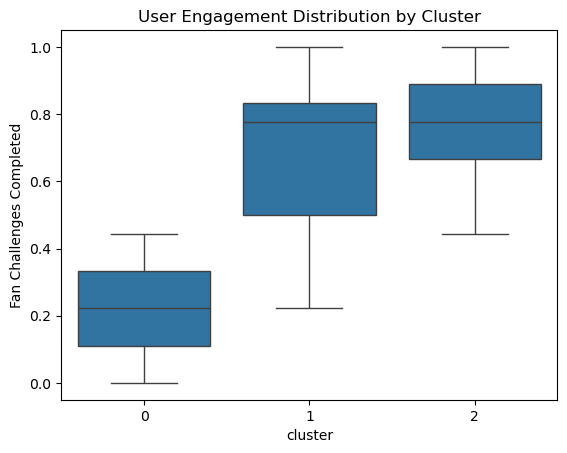

In [28]:
# Data Visualization
sns.boxplot(x='cluster', y='Fan Challenges Completed', data=data)
plt.title('User Engagement Distribution by Cluster')
plt.show()

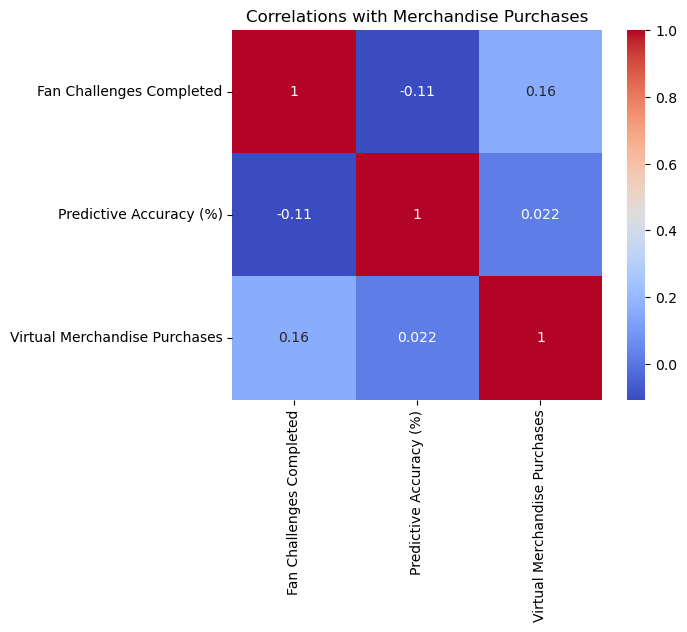

In [30]:
corr = data[['Fan Challenges Completed', 'Predictive Accuracy (%)', 'Virtual Merchandise Purchases']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlations with Merchandise Purchases')
plt.show()

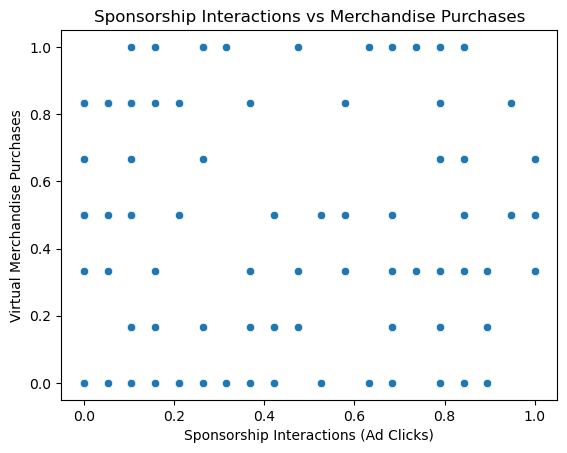

In [42]:
sns.scatterplot(x='Sponsorship Interactions (Ad Clicks)', y='Virtual Merchandise Purchases', data=data)
plt.title('Sponsorship Interactions vs Merchandise Purchases')
plt.show()